# America Company Bankrupt Prediction Gradient Boost Best (2)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import keras
import pickle

In [7]:
# library dibawah sebenarnya udah ada di pyforest
from sklearn.model_selection       import train_test_split
from sklearn.feature_selection     import SelectKBest, f_classif
from sklearn.preprocessing         import MinMaxScaler, StandardScaler
from sklearn.preprocessing         import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline              import make_pipeline
from sklearn.compose               import ColumnTransformer
from sklearn.metrics               import (f1_score,
                                           precision_score,
                                           recall_score,
                                           log_loss,
                                           accuracy_score,
                                           classification_report,
                                           ConfusionMatrixDisplay,
                                           confusion_matrix)


from sklearn.ensemble              import StackingClassifier
from sklearn.pipeline              import Pipeline
from sklearn.preprocessing         import StandardScaler
from sklearn_pandas                import DataFrameMapper
from sklearn.ensemble              import AdaBoostClassifier
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.linear_model          import LogisticRegression
from matplotlib.colors             import ListedColormap
from sklearn.linear_model          import SGDClassifier
from sklearn.ensemble              import RandomForestClassifier
from sklearn.linear_model          import SGDClassifier
from sklearn.svm                   import SVC
from sklearn.naive_bayes           import GaussianNB
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.neighbors             import NeighborhoodComponentsAnalysis
from keras.callbacks               import EarlyStopping

In [8]:
import tensorflow as tf #cek versi tensorflow
print(tf.__version__)

2.15.0


In [9]:
from google.colab import drive
from pyforest                      import *

In [9]:
!pip install pandas --upgrade

In [10]:
drive.mount('/content/drive')
X_train         = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/bankrupt/data/X_train.csv')
X_train_balance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/bankrupt/data/X_train_balance.csv')
X_test          = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/bankrupt/data/X_test.csv')

y_train         = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/bankrupt/data/y_train.csv')
y_train_balance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/bankrupt/data/y_train_balance.csv')
y_test          = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/bankrupt/data/y_test.csv')

Mounted at /content/drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
X_train_balance.shape

(110260, 14)

In [12]:
print(y_train_balance.value_counts(normalize=True))

bankrupt
0.0         0.5
1.0         0.5
Name: proportion, dtype: float64


In [13]:
print(y_train.value_counts(normalize=True))

bankrupt
0.0         0.934233
1.0         0.065767
Name: proportion, dtype: float64


Penerapan dari teknik sampling/balancing data tersebut dengan menggunakan SMOTE dengan strategi 'auto' dapat membuat atau meningkatkan sampel sintesis dalam kelas minoritas yaitu 'bankrupt' = 1

In [14]:
X_train.shape

(59011, 14)

In [15]:
X_train_balance.shape

(110260, 14)

In [16]:
ccount = y_train_balance['bankrupt'].value_counts()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

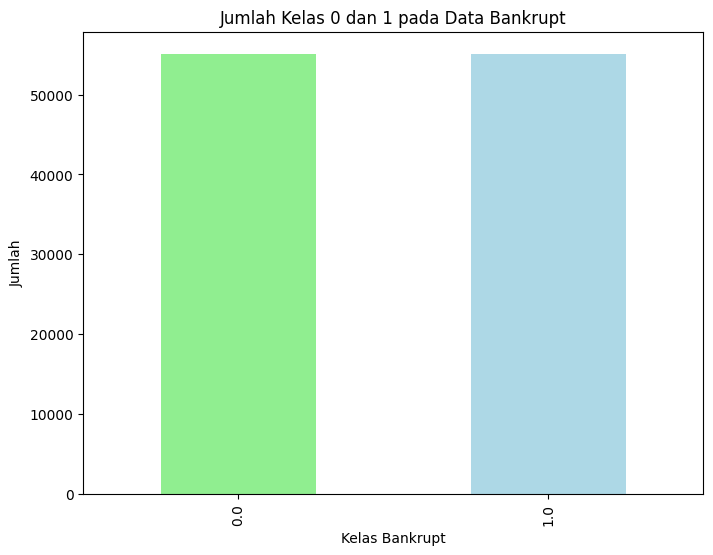

In [17]:
plt.figure(figsize=(8, 6))
ccount.plot(kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Jumlah Kelas 0 dan 1 pada Data Bankrupt')
plt.xlabel('Kelas Bankrupt')
plt.ylabel('Jumlah')
plt.show()

#### Hasil analisis model
- SGD: menunjukkan performa model akurasi yang membaik, namun parameter evaluasi lainnya memiliki performa yang buruk.
- KNN Ball: Model mengalami overfitting ditunjukkan dengan nilai precision yang drastis menurun ketika model diuji/test.
- KNN Tree: Model mengalami overfitting juga dengan nilai precision yang juga drastis menurun ketika model diuji.
- Decision tree: Model sudah jelas mengalami overfit, ditunjukkan juga dengan nilai parameter precision yang drastis menurun dan juga f1-score.
- Random forest: Model mungkin sudah jelas mengalami overfitting, ditunjukkan dengan beberapa parameter evaluasi yang performanya menurun. Namun hal ini masih bisa diatasi dengan menggunakan nilai parameter yang benar dengan **Tuning**.
- Ada Boost: Modelnya overfitting
- Gradient Boosting: Modelnya overfitting juga, namun masih mungkin diterapkan **tuning**
- Gaussian Naive Bayes: Modelnya underfit
- SGD: Modelnya mungkin mengalami overfit. Namun kita coba tinjau lebih lanjut dengan **tuning**.

#### Memilih model yang tidak overfiting atau underfit untuk dilanjutkan pada tahap Hyperparameter atau Tuning


Berdasarkan hasil evaluasi **tiga model terbaik** adalah:
- [Random Forest]
- [Gradient Boost]
- [Stochastic Gradien Descent]


In [12]:
# y_true itu y_test
def model_report(y_true, y_pred):

    acc                     = accuracy_score(y_true, y_pred)
    pre                     = precision_score(y_true, y_pred)
    rec                     = recall_score(y_true, y_pred)
    f1                      = f1_score(y_true, y_pred)
    loss                    = log_loss(y_true, y_pred)

    print("accuracy:   {:3f}\nprecision:  {:3f}\nrecall:     {:3f}\nf1-score:   {:3f}\nloss:       {:3f}".
          format(acc, pre, rec, f1, loss))

In [13]:
# Fungsi Evaluasi Suatu Model dengan Confusion Matrix
def plot_confusion_matriks(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tampil = ConfusionMatrixDisplay(confusion_matrix=cm)

    tampil.plot(cmap='Greys')

    plt.title('Confusion Matrix')
    plt.show()

### HyperTuning Machine Learning Model

### Gradient Boost Tuning Parameter
Hasil parameter dari GBC Classifier dibawah ini didapat dari beberapa percobaan training.

In [23]:
# coba coba trial and error si learning ratenya
learn_list = [0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

sesuaikan tuning parameter dengan spek cpu/gpu. disini aku tuning si learning rate biar ga terlalu lama dan nngeberatin

In [25]:
# Hypertuning kedua Gradient Boost karena aku pikir masih ada kemungkinan

for learn in learn_list:
    gb_lr = GradientBoostingClassifier(n_estimators=20,
                                    learning_rate=learn,
                                    max_features=2,
                                    max_depth=2,
                                    random_state=123)

    gb_lr.fit(X_train_balance, y_train_balance)

    print('Learning ratenya: ', learn)
    print('Akurasi Training: {0:.3f}'.format(gb_lr.score(X_train_balance,
                                                         y_train_balance)))

    print('Akurasi Validasi (test): {0:.3f}'.format(gb_lr.score(X_test,
                                                                y_test)),'\n')

<IPython.core.display.Javascript object>

Learning ratenya:  0.01
Akurasi Training: 0.681
Akurasi Validasi (test): 0.600 



<IPython.core.display.Javascript object>

Learning ratenya:  0.025
Akurasi Training: 0.680
Akurasi Validasi (test): 0.602 



<IPython.core.display.Javascript object>

Learning ratenya:  0.05
Akurasi Training: 0.682
Akurasi Validasi (test): 0.607 



<IPython.core.display.Javascript object>

Learning ratenya:  0.075
Akurasi Training: 0.682
Akurasi Validasi (test): 0.602 



<IPython.core.display.Javascript object>

Learning ratenya:  0.1
Akurasi Training: 0.688
Akurasi Validasi (test): 0.611 



<IPython.core.display.Javascript object>

Learning ratenya:  0.25
Akurasi Training: 0.693
Akurasi Validasi (test): 0.624 



<IPython.core.display.Javascript object>

Learning ratenya:  0.5
Akurasi Training: 0.705
Akurasi Validasi (test): 0.635 



<IPython.core.display.Javascript object>

Learning ratenya:  0.75
Akurasi Training: 0.711
Akurasi Validasi (test): 0.644 



<IPython.core.display.Javascript object>

Learning ratenya:  1
Akurasi Training: 0.714
Akurasi Validasi (test): 0.645 



In [ ]:
lr = [0.1, 0.25, 0.5, 1]

In [27]:
n_estimators = 300
max_depth = 8
random_state = 123

gbc_best_lr = []
for lr_value in lr:
    gbc = GradientBoostingClassifier(n_estimators=n_estimators,
                                      learning_rate=lr_value,
                                      max_depth=max_depth,
                                      random_state=random_state)
    gbc.fit(X_train_balance, y_train_balance)
    score = gbc.score(X_test, y_test)
    gbc_best_lr.append((lr_value, score))

# Urutin hasil berdasarkan nilai score
gbc_best_lr = sorted(gbc_best_lr, key=lambda x: x[1], reverse=True)
print(gbc_best_lr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[(0.5, 0.9064104519343196), (0.25, 0.9046311829596868), (0.1, 0.884398352905292), (0.1, 0.884398352905292)]


In [ ]:
## Gradient Boosting Classifier
gbc_best_2 = GradientBoostingClassifier(n_estimators=300,
                                  learning_rate=0.5,
                                  max_depth=8,
                                  random_state=123)

gbc_best_2.fit(X_train_balance, y_train_balance) # Adjust model

In [15]:
y_tt_gbc_best2 = gbc_best_2.predict(X_test)

In [16]:
model_report(y_test, y_tt_gbc_best2)

accuracy:   0.906410
precision:  0.376355
recall:     0.570575
f1-score:   0.453547
loss:       3.373309


In [17]:
print('Klasifikasi Report dari Best Gradient Boost 2:')
print(classification_report(y_test, y_tt_gbc_best2))

Klasifikasi Report dari Best Gradient Boost 2:
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95     18332
         1.0       0.38      0.57      0.45      1339

    accuracy                           0.91     19671
   macro avg       0.67      0.75      0.70     19671
weighted avg       0.93      0.91      0.92     19671



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

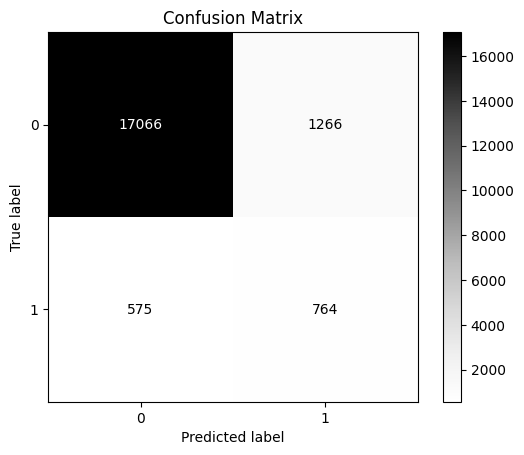

In [18]:
plot_confusion_matriks(y_test, y_tt_gbc_best2)

### Best Machine Learning Model

In [20]:
import joblib

# Simpan model terbaik ke dalam file
joblib.dump(gbc_best_2, '/content/drive/MyDrive/Colab Notebooks/dataset/bankrupt/Gradient Boost Classifier_90.pkl')

['/content/drive/MyDrive/Colab Notebooks/dataset/bankrupt/Gradient Boost Classifier_90.pkl']